In [13]:
%matplotlib inline
import requests
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.offsetbox import  OffsetImage

In [3]:
# 画球场
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # 如果坐标轴对象不提供绘图，就创建一个
    if ax is None:
        ax = plt.gca()

    # 创建 NBA 篮球场

    # 绘制篮球框
    # 直径18的篮球框
    # 7.5在坐标中
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # 绘制篮板
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # 绘制矩形宽 16ft, 高 19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # 绘制里面的小矩形, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # 绘制罚球顶弧
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # 绘制罚球低弧
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # 限制区, 以篮筐为中心，半径为 4ft的弧
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # 三分线
    # 绘制三分线边线，长 14ft 
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 三分线弧度，以篮筐为中心，离篮筐23.9
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # 球场中心
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # 将上面写的球场属性用列表在轴上画出来
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # 画半场线，基础线以及边缘线
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # 添加球场元素到坐标上
    for element in court_elements:
        ax.add_patch(element)

    return ax

请输入绘制图形的球员ID 202691
获取数据...
解析数据...
获取头像...
绘制投篮点...
绘制球场...
绘制头像...


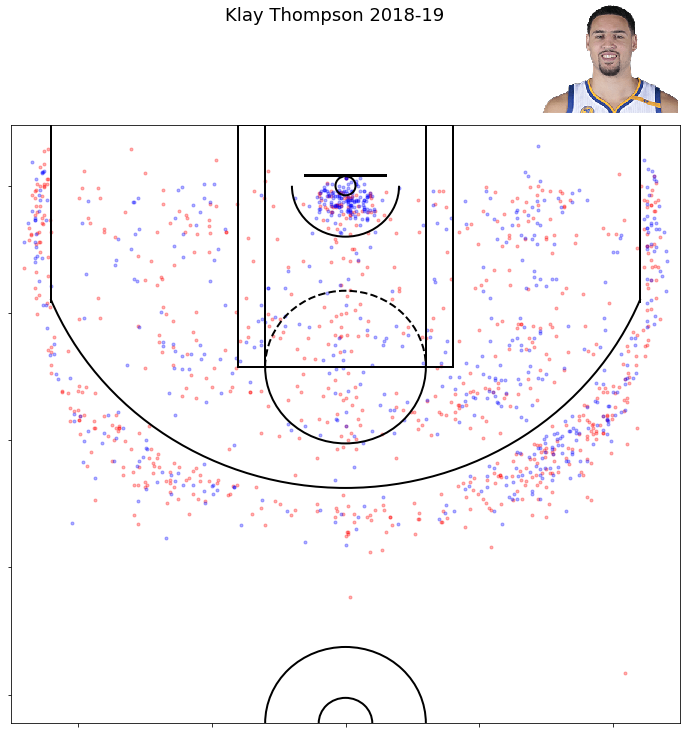

In [38]:
a = input('请输入绘制图形的球员ID ')

url = "https://stats.nba.com/stats/shotchartdetail?CFID=33&CFPARAMS=2018-19&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID="+ a + "&PlusMinus=N&Position=&Rank=N&RookieYear=&Season=2018-19&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&mode=Advanced&showDetails=0&showShots=1&showZones=0&PlayerPosition="
headers = {'User-Agent':'chrome'}

print('获取数据...')
# 请求含有球员投球数据的url
response = requests.get(url, headers=headers,timeout=5)

print('解析数据...')
data = response.json()
# 获取列名即每项投球数据的意思
headers = data['resultSets'][0]['headers']
# 获取投球的相关数据
shots = data['resultSets'][0]['rowSet']

shot_df = pd.DataFrame(shots, columns=headers)
# print(shot_df)

print('获取头像...')
# 参数为图片连接
# 可以添加第二个参数保存图片
pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/" + a + ".png")

# urlretrieve 返回元组，image 在第一个 
# imread 读取图像为多维 numpy 数组；所以 matplotlib 可以绘图
head_pic = plt.imread(pic[0])

print('绘制投篮点...')
fig = plt.figure(figsize=(12,11))
made = shot_df[shot_df['SHOT_MADE_FLAG']==1]
miss = shot_df[shot_df['SHOT_MADE_FLAG']==0]
plt.scatter(miss.LOC_X, miss.LOC_Y, color='r', marker='.', alpha=0.3)
plt.scatter(made.LOC_X, made.LOC_Y, color='b', marker='.', alpha=0.3)

print('绘制球场...')
draw_court()
# 调整 x 轴使其适应半场
plt.xlim(-250,250)
# y 轴值从下到上依次递减
# 便于将球筐至于图的顶部
plt.ylim(422.5, -47.5)
# 消除坐标轴刻度
plt.tick_params(labelbottom=False, labelleft=False)

print('绘制头像...')
#将球员图片放置于右上角，并设置缩小等级以配合整个图片
img = OffsetImage(head_pic, zoom=0.6)
# (x, y) 控制将球员放在你想要放的位置
img.set_offset((540,621))
# 添加球员图片
fig.gca().add_artist(img)
# 添加标题
name = shot_df.iloc[1]['PLAYER_NAME']
fig.suptitle(name + ', 2018-19', y=1.03, fontsize=18)
# 消除刻度
plt.tick_params(labelbottom=False, labelleft=False)
#保存图片，添加自己的路径
plt.savefig(name + '.png', bbox_inches='tight', pad_inches=0.5, dpi=fig.dpi)
plt.show()